In [121]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV

In [27]:
df1 = pd.read_csv('Google_Trends/google_trends_bitcoin.csv')
df1['date'] = df1['date'].dropna()
df1 = df1[df1['date'].isnull() == False]

df2 = pd.read_csv('Google_Trends/google_trends_blockchain.csv')
df2['date'] = df2['date'].dropna()
df2 = df2[df2['date'].isnull() == False]

df3 = pd.read_csv('Google_Trends/google_trends_cryp.csv')
df3['date'] = df3['date'].dropna()
df3 = df3[df3['date'].isnull() == False]

df4 = pd.read_csv('Google_Trends/google_trends_eth.csv')
df4['date'] = df4['date'].dropna()
df4 = df4[df4['date'].isnull() == False]


In [28]:
df_list1 = [df1, df2, df3, df4]

In [29]:
df_google_mega = df1.append(df2)

In [31]:
df_google_mega = df_google_mega.append(df3)
df_google_mega = df_google_mega.append(df4)

In [40]:
df_google_mega = df_google_mega.sort_values('date')

In [41]:
df_google_mega = df_google_mega.groupby('date').sum()
#i think groupby set it to be the index?
# print(df_google_mega.index) is telling me the index is the date

In [49]:
df_google_mega = df_google_mega['2017-11-16':'2018-03-21']

In [50]:
df_google_mega.to_csv('google_mega.csv')

In [119]:
#df_google_mega

In [64]:
#loading in the DJI feature

df_DJI = pd.read_csv('DJI.csv')
df_DJI.index = df_DJI['Date']
#df_DJI = df_DJI['Close']
df_DJI = df_DJI['2017-11-16':'2018-03-21']


In [87]:
df_btc = pd.read_csv('final_btc_price.csv', header=None, names = ['Date','Price'])
df_eth = pd.read_csv('final_eth_price.csv', header=None, names = ['Date','Price'])
#Header = none is essential or else it would replace first data point with names

In [83]:
#pd.read_csv(data, usecols=['foo', 'bar'])
df_btc = pd.read_csv('final_btc_price.csv', header=None, names = ['Date','Price'])

df_btc.index = df_btc['Date']
#df_btc = df_btc['Price']
df_btc = df_btc['2017-11-16':'2018-03-21']


In [91]:
#df_eth

In [89]:
#pd.read_csv(data, usecols=['foo', 'bar'])
#df_btc = pd.read_csv('final_btc_price.csv', header=None, names = ['Date','Price'])

df_eth.index = df_eth['Date']
#df_eth = df_eth['Price']
df_eth = df_eth['2017-11-16':'2018-03-21']


In [55]:
#MAKING ONE DATAFRAME 
df_ultra_mega_frame = df_google_mega

In [67]:
df_ultra_mega_frame['DJI'] = df_DJI['Close']

/Users/Alexandra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
for index, item in enumerate(df_ultra_mega_frame['DJI']):
    if np.isnan(item) == True:
        df_ultra_mega_frame['DJI'].iloc[index] = df_ultra_mega_frame['DJI'].iloc[index-1]
        #THANK YOU DAN!
        
#df_ultra_mega_frame['DJI'] = 

/Users/Alexandra/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/Alexandra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [85]:
df_ultra_mega_frame['price_btc'] = df_btc['Price']

/Users/Alexandra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [92]:
df_ultra_mega_frame['price_eth'] = df_eth['Price']

/Users/Alexandra/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
df_ultra_mega_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 2017-11-16 to 2018-03-21
Data columns (total 4 columns):
SearchFrequency    126 non-null int64
DJI                126 non-null float64
price_btc          126 non-null float64
price_eth          126 non-null float64
dtypes: float64(3), int64(1)
memory usage: 9.9+ KB


In [96]:
df_ultra_mega_frame.to_csv('df_ultra_mega_frame.csv') #we later split this into 

In [97]:
df_ultra_mega_frame

,SearchFrequency,DJI,price_btc,price_eth
date,,,,
2017-11-16,55,23458.359375,7871.69,330.92
2017-11-17,75,23358.240234,7708.99,332.39
2017-11-18,103,23358.240234,7790.15,347.61
2017-11-19,65,23358.240234,8036.49,354.39
2017-11-20,96,23430.330078,8200.64,366.73
2017-11-21,118,23590.830078,8071.26,360.40
2017-11-22,100,23526.179688,8253.55,380.65
2017-11-23,98,23526.179688,8038.77,410.17
2017-11-24,89,23557.990234,8253.69,474.91


### MODELING

In [106]:
from sklearn.ensemble import RandomForestRegressor

#can x be a dataframe?? algorithms need arrays!
#can convert dtaframe to numpy arrays

In [ ]:
#Y variable turn into 1's or 0's
#Y (ethereum) if n+1 is > n then 1 else 0 ,
#start at 2nd and give it a zero or 1 
#the column of zeroes and 1 would then become the would become the target.
#remeber to remove etheruem feature before training model 
#randon forest classification, logistic regression classification

In [107]:
y = np.array(df_ultra_mega_frame['price_eth'])
# Remove the labels from the features
# axis 1 refers to the columns
features= df_ultra_mega_frame.drop('price_eth', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns) #this way we remeber the column names
# Convert to numpy array
X = np.array(features) #because once we convert to np array it drops the names

In [111]:
#X.shape
#y.shape good to check these

array([ 330.92,  332.39,  347.61,  354.39,  366.73,  360.4 ,  380.65,
        410.17,  474.91,  466.28,  471.33,  480.36,  472.9 ,  427.52,
        447.11,  466.54,  463.45,  465.85,  470.2 ,  463.28,  428.59,
        434.41,  456.03,  473.5 ,  441.72,  515.14,  651.43,  702.77,
        695.82,  684.45,  696.21,  719.98,  794.64,  826.82,  819.09,
        821.06,  674.86,  719.39,  694.15,  765.83,  773.84,  762.84,
        737.02,  753.59,  717.26,  756.73,  772.64,  884.44,  962.72,
        980.92,  997.72, 1041.68, 1153.17, 1148.53, 1299.74, 1255.82,
       1154.93, 1273.2 , 1396.42, 1366.77, 1291.92, 1053.69, 1014.25,
       1036.28, 1039.1 , 1155.15, 1049.58, 1003.26,  986.23, 1058.78,
       1056.03, 1055.17, 1107.07, 1246.01, 1182.36, 1071.13, 1118.31,
       1036.79,  915.78,  964.02,  834.68,  697.95,  793.12,  757.07,
        817.81,  883.87,  860.41,  814.66,  868.71,  845.26,  923.56,
        936.98,  944.21,  974.12,  923.92,  943.87,  895.37,  849.97,
        812.85,  864

In [112]:
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, 
#                          test_size = 0.25, random_state = 42)

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [113]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False)

In [114]:
print(regr.feature_importances_) #strength of importance of feature in the model
#but is using the other two because they are not zero!!!

[0.01590281 0.94405113 0.04004606]


In [115]:
print(regr.predict(X_test))

[1114.12674763  617.89886313  845.8458259  1087.26301234  845.8458259
 1087.26301234  770.27835392  928.40434538  824.74849407  770.27835392
  438.05447288  824.74849407  770.27835392  770.27835392  931.99236558
  617.89886313  876.61368701  451.59475065  983.78302396  451.59475065
  770.27835392  748.29913732 1087.26301234  418.84221573  983.78302396
  770.27835392 1087.26301234  503.13590401  770.27835392  770.27835392
  770.27835392  641.37032741]


In [117]:
#now can compare with the original X_train!!!
#using score 
regr.score(X_test, Y_test) #X_test , as seen above...X_test has more dimensions than the output on predict

0.8017445780922451

In [124]:
#use a grid search

param_grid = {"criterion": ["mse", "mae"], #mean squared error and mean absolute error in documentation
              #"min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "n_estimators":[50, 100, 200]
              #"min_samples_leaf": [20, 40, 100],
              #"max_leaf_nodes": [5, 20, 100, 500, 800],
              }

grid_cv_regr = GridSearchCV(regr, param_grid, cv=5)

grid_cv_regr.fit(X_train, Y_train) #features and labels

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [126]:
print("R-Squared::{}".format(grid_cv_regr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_regr.best_params_))

#random forest builds multiple decision trees 
#best number of decision trees
#depth of each tree shouldnt be more than 8 levels
#go down to 8 levels(splits) but dont split it further

R-Squared::0.781573998077793
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 100}


In [128]:
df = pd.DataFrame(data=grid_cv_regr.cv_results_)
df.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_criterion,param_max_depth,param_n_estimators,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.049420,0.004373,0.635309,0.778977,mse,2,50,"{'criterion': 'mse', 'max_depth': 2, 'n_estima...",15,0.613964,...,0.451744,0.804077,0.656762,0.758853,0.675603,0.792493,0.006796,0.001624,0.107580,0.016929
1,0.089607,0.007720,0.642203,0.783669,mse,2,100,"{'criterion': 'mse', 'max_depth': 2, 'n_estima...",14,0.632470,...,0.452446,0.807411,0.661534,0.761985,0.677862,0.795574,0.002713,0.004802,0.109303,0.016629
2,0.179562,0.010158,0.645046,0.783199,mse,2,200,"{'criterion': 'mse', 'max_depth': 2, 'n_estima...",13,0.646579,...,0.453979,0.809105,0.664311,0.762408,0.674158,0.792468,0.002274,0.000931,0.108315,0.016699
3,0.045795,0.002975,0.772805,0.966819,mse,6,50,"{'criterion': 'mse', 'max_depth': 6, 'n_estima...",6,0.779761,...,0.534255,0.973722,0.834329,0.969750,0.826922,0.963078,0.001399,0.000236,0.125263,0.004298
4,0.098358,0.005223,0.779033,0.967569,mse,6,100,"{'criterion': 'mse', 'max_depth': 6, 'n_estima...",3,0.771612,...,0.537566,0.973433,0.843001,0.968763,0.847150,0.964772,0.003251,0.000178,0.128224,0.003374


In [130]:
results = grid_cv_regr.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))
    
#the highest is n=100, and mx depth 8 

{'criterion': 'mse', 'max_depth': 2, 'n_estimators': 50} 0.6353 0.1076
{'criterion': 'mse', 'max_depth': 2, 'n_estimators': 100} 0.6422 0.1093
{'criterion': 'mse', 'max_depth': 2, 'n_estimators': 200} 0.645 0.1083
{'criterion': 'mse', 'max_depth': 6, 'n_estimators': 50} 0.7728 0.1253
{'criterion': 'mse', 'max_depth': 6, 'n_estimators': 100} 0.779 0.1282
{'criterion': 'mse', 'max_depth': 6, 'n_estimators': 200} 0.7762 0.1262
{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 50} 0.7741 0.1249
{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 100} 0.7816 0.1313
{'criterion': 'mse', 'max_depth': 8, 'n_estimators': 200} 0.7797 0.1288
{'criterion': 'mae', 'max_depth': 2, 'n_estimators': 50} 0.589 0.1577
{'criterion': 'mae', 'max_depth': 2, 'n_estimators': 100} 0.6003 0.16
{'criterion': 'mae', 'max_depth': 2, 'n_estimators': 200} 0.6018 0.1695
{'criterion': 'mae', 'max_depth': 6, 'n_estimators': 50} 0.739 0.1527
{'criterion': 'mae', 'max_depth': 6, 'n_estimators': 100} 0.74 0.1553
{'cri

In [131]:
grid_cv_regr.score(X_test, Y_test) #this is really great!!!

0.9439053866082423

In [ ]:
#do classicfication first 
#got default score then i tuned model with cross validation and got a better.

#classification just y changes.

In [ ]:
#good result its a chi squared... but no cross validation, in chi squared if you get zero you overfit
#if you get 1 then 
#claiming its slightly over fit. if your between zero and 1 then you are probably slightly overfit
# skit learn function that allows for cross validation.
# as of right now 

# classification is next 

#did not forecast what is to come?
#how changes in the dow jones might cause changes in ethereum
#if you can predict changes in the dow jones might be able to predict changes in ethereum
# dont have the ability to forecast ?? 
#regression model can forecast?
#if you knew by monday that on tuesday dow jones will go up
#then you could use to forcast ethereum price

#what i found is found correlation but not causation.
#predict changes based on day to day fluctions.
#maybe it would be higher correlation with 


### below here is quite a bit

In [50]:
df_new1 = df19.append(df20)

In [52]:
df_new1 = df_new1.append(df22)
df_new1['timestamp'] = df_new1['timestamp'].dropna()
df_new1 = df_new1[df_new1['timestamp'].isnull() == False]

In [54]:
len(df_new1) #cool these are about same length

3556521

In [4]:
import datetime
import time

In [30]:
df_new = df1.append(df2)
df_new['timestamp'] = df_new['timestamp'].dropna()
df_new = df_new2[df_new['timestamp'].isnull() == False]

In [46]:
df_new = df_new.append(df18)

In [47]:
len(df_new) #3388053 or about 3 mill

3388053

In [55]:
df_new2 = df_new.append(df_new1)

In [56]:
len(df_new2)

6944574

In [58]:
df_new2.to_csv('mega_sentiment.csv')

#### above here is concatenating

now time for putting into textblob

In [60]:
df_new2['timestamp'] = df_new2['timestamp'].dropna()
df_new2 = df_new2[df_new2['timestamp'].isnull() == False] #i think does same thing as one above

KeyboardInterrupt: 

In [59]:
int_time = [int(item) for item in df_new2['timestamp']]

ValueError: cannot convert float NaN to integer

In [78]:
df['timestamp'] = [datetime.datetime.fromtimestamp(item) for item in int_time]

In [79]:
#df['timestamp'] = [time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime(item)) for item in int_time] #string not datetime

In [80]:
from textblob import TextBlob

In [81]:
df = df[df.text.str.contains("[deleted]") == False]

In [82]:
df['text'] = [str(item) for item in df['text']]

In [83]:
textblob_objects = [TextBlob(item) for item in df['text']]

In [84]:
print(textblob_objects[0])

Thank you


In [85]:
print(textblob_objects[0].tags)

[('Thank', 'NN'), ('you', 'PRP')]


In [86]:
#now we need to average the sentiment and get and average for each day
#will start with each column gets a sentiment score and 

In [87]:
sent_polarity = [item.sentiment.polarity for item in textblob_objects]

In [88]:
sent_subjectivity = [item.sentiment.polarity for item in textblob_objects]

In [89]:
df['sent polarity'] = sent_polarity

In [90]:
df['sent subjectivity'] = sent_subjectivity

In [91]:
df

,Unnamed: 0,doc_id,doc_type,resp_to,text,timestamp,sent polarity,sent subjectivity
30,30,7d7sq8,slc_comment,Upvoting this so it gets more attention. I hop...,Thank you,2017-11-16 06:36:47,0.000000,0.000000
128,128,7d7sq8,comment,NaN,Thank you,2017-11-16 06:36:47,0.000000,0.000000
166,166,7d7sq8,slc_comment,Thanks - got wind of the situation this mornin...,ENABLE MULTI-FACTOR AUTHENTICATION PLEASE.,2017-11-16 15:17:31,0.000000,0.000000
180,180,7d7sq8,slc_comment,"Because it can generally mean ""departing"" whic...","### EXODUS 20:15 ""**THOU SHALT NOT STEAL**""",2017-11-16 17:46:00,0.000000,0.000000
187,187,7d7sq8,slc_comment,you mentioned you took a shower. anyone in the...,No haha,2017-11-16 03:48:36,-0.100000,-0.100000
250,250,7d7sq8,comment,NaN,ENABLE MULTI-FACTOR AUTHENTICATION PLEASE.,2017-11-16 15:17:31,0.000000,0.000000
262,262,7d7sq8,comment,NaN,"### EXODUS 20:15 ""**THOU SHALT NOT STEAL**""",2017-11-16 17:46:00,0.000000,0.000000
266,266,7d7sq8,comment,NaN,No haha,2017-11-16 03:48:36,-0.100000,-0.100000
267,267,7d7sq8,slc_comment,No haha,Xanax?,2017-11-16 04:08:05,0.000000,0.000000
324,324,7d7sq8,comment,NaN,Xanax?,2017-11-16 04:08:05,0.000000,0.000000


In [21]:
# NOW!! how do I average the sentiment for each day?
# oh i need to subtract the min from everything??
# 

df['sent polarity'] =  df['sent polarity'] - min(df['sent polarity'])
#subtract the min from everything but subtracting negative1 is like adding 1

df['sent polarity'] = df['sent polarity']/(max(df['sent polarity']))

In [92]:
df = df.set_index(df['timestamp'])

In [93]:
df['day'] = [item.strftime('%Y-%m-%d') for item in df['timestamp']]

In [94]:
df_tstmp_sent = df.filter(items=['day', 'sent polarity'])

In [107]:
df1 = df_tstmp_sent.groupby('day').mean()

In [108]:
#df1 #ugh they are all about 0.5

In [109]:
#df_mean = df.groupby(df['timestamp'].dt.normalize()).mean() #.dt.normalize()) what does this mean? google

In [110]:
#df['timestamp'].dt.normalize() #then we do groupby and get mean scores and sentiment

In [111]:
list1 = df1['sent polarity'].loc['2017-11-15':'2018-03-21']

In [120]:
#print(list1)

In [113]:
df1['sent polarity'] = df1['sent polarity'] - (min(df1['sent polarity']))

In [114]:
df1['sent polarity'].max()

0.7178571428571427

In [115]:
mean_list_norm = list1/(df1['sent polarity'].max())

In [123]:
#mean_list_norm

In [117]:
mean_list_norm.min()

0.0

In [118]:
mean_list_norm.max()

1.0

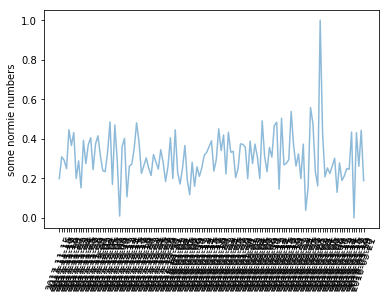

In [119]:
import matplotlib.pyplot as plt
plt.plot(mean_list_norm, alpha = 0.5)
#plt.plot(df_gg_norm, alpha = 0.5)
plt.ylabel('some normie numbers')
plt.xticks(rotation=70)
plt.show()